# Introducción a Python para análisis de datos 

In [3]:
pip install numpy<2.0

Note: you may need to restart the kernel to use updated packages.


El sistema no puede encontrar el archivo especificado.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

Pueden descargar las bases de datos desde la web del INEI (https://proyectos.inei.gob.pe/microdatos/), trabajaremos con los archivos csv. Los módulos de interés para la sesión se encuentran en PAIDEIA.

#### Ejercicios Prácticos - ENAHO (Módulo 5: Empleo e Ingresos)

In [5]:
modulo_5= pd.read_csv("Enaho01a-2023-500.csv",encoding = "latin-1", low_memory=False)
# Las encuestas del INEI están en español y tienen caracteres como ˜ de la ñ o el acento. Por ello, a las opciones de lectura del csv agregamos la opción encoding = "latin-1".
#  low_memory=False: cuando el archivo contiene columnas con tipos mixtos.
modulo_5.columns= modulo_5.columns.str.lower()
# Establecemos que el nombre de las columnas estén en minúscula
modulo_5

,año,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,...,i538e1,i5294b,i5404b,i541a,ocu500,ocupinf,emplpsec,fac500a,nconglome,sub_conglome
0,2023,1,5030,2,11,1,10201,7,4,1,...,,,,,1,2,,165.623856,6618,0
1,2023,1,5030,2,11,2,10201,7,4,2,...,,,,,1,2,,112.328087,6618,0
2,2023,1,5030,11,11,1,10201,7,4,1,...,,,,,1,1,1,96.035370,6618,0
3,2023,1,5030,11,11,2,10201,7,4,2,...,,,,,1,1,1,86.868881,6618,0
4,2023,1,5030,11,11,3,10201,7,4,3,...,,,,,1,1,1,185.492355,6618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86649,2023,12,20670,67,11,2,10503,4,8,2,...,,,,,1,1,1,52.368996,7051,0
86650,2023,12,20670,68,11,1,10503,4,8,1,...,708,,,,1,1,1,94.397972,7051,0
86651,2023,12,20670,69,11,1,10503,4,8,1,...,,,,,1,1,1,54.246708,7051,0
86652,2023,12,20670,69,11,2,10503,4,8,2,...,,,,,1,1,1,69.487373,7051,0


Variable de interés: Ingreso mensual

p523: En su ocupación principal, ¿A usted le pagan

    1 Diario
    2 Semanal
    3 Quincenal
    4 Mensual

p524a1: Ingreso total (en la frecuencia anterior)

In [6]:
variables =['p523','p524a1']
data = modulo_5[variables].copy()
data.info()
# Dtype: object, indica que la columna contiene valores que no son puramente numéricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86654 entries, 0 to 86653
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p523    86654 non-null  object
 1   p524a1  86654 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [7]:
# Transformamos los datos a valores numéricos:
data[['p523', 'p524a1']] = data[['p523', 'p524a1']].apply(pd.to_numeric, errors="coerce")
data.dropna(subset=['p523', 'p524a1'], inplace=True)
data

,p523,p524a1
0,4.0,1800.0
5,4.0,1900.0
9,4.0,2100.0
13,4.0,650.0
15,4.0,50.0
...,...,...
86633,2.0,160.0
86634,2.0,160.0
86635,4.0,1460.0
86636,2.0,90.0


In [8]:
# Diccionario con los multiplicadores de frecuencia
multiplicadores = {
    1: 30,  # Diario
    2: 4,   # Semanal
    3: 2,   # Quincenal
    4: 1    # Mensual
}

# Calcular el ingreso mensual usando el diccionario
data['ingreso_mensual'] = data['p524a1'] * data['p523'].map(multiplicadores)
data

,p523,p524a1,ingreso_mensual
0,4.0,1800.0,1800.0
5,4.0,1900.0,1900.0
9,4.0,2100.0,2100.0
13,4.0,650.0,650.0
15,4.0,50.0,50.0
...,...,...,...
86633,2.0,160.0,640.0
86634,2.0,160.0,640.0
86635,4.0,1460.0,1460.0
86636,2.0,90.0,360.0


In [9]:
# Estadísticas decriptivas

print("Media:", round(data['ingreso_mensual'].mean(),2))
print("Mediana:", round(data['ingreso_mensual'].median(),2))
print("Desviación estándar:", round(data['ingreso_mensual'].std(),2))
print("Varianza:", round(data['ingreso_mensual'].var(),2))
print("Moda:", data['ingreso_mensual'].mode()[0])
print("Valor mínimo:", data['ingreso_mensual'].min())
print("Valor máximo:", data['ingreso_mensual'].max())

Media: 27996.75
Mediana: 1200.0
Desviación estándar: 438298.32
Varianza: 192105415537.98
Moda: 1200.0
Valor mínimo: 10.0
Valor máximo: 29999970.0


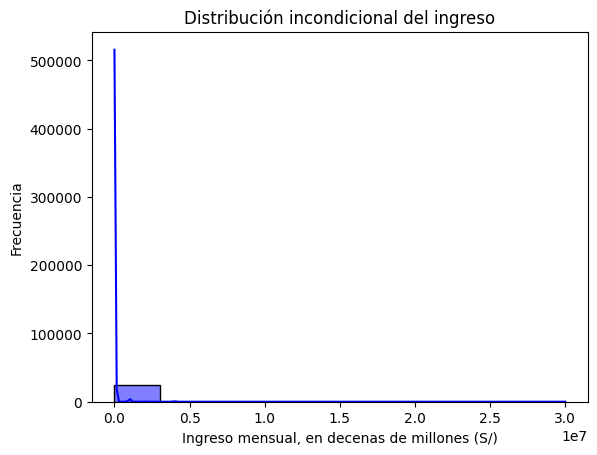

In [10]:
# Gráfico de distribución incondicional

# Crear un histograma con un gráfico de densidad
sns.histplot(data['ingreso_mensual'], kde=True, color="blue", bins=10)

plt.title("Distribución incondicional del ingreso")
plt.xlabel("Ingreso mensual, en decenas de millones (S/)")
plt.ylabel("Frecuencia")
plt.show()

Aplicar una transformación logarítmica:

Si los datos tienen una distribución con muchos valores pequeños y algunos grandes, se puede usar una escala logarítmica para comprimir el rango y visualizar mejor la distribución.

In [11]:
# Creamos una nueva columna para el logaritmo del ingreso mensual
data['log_ingreso_mensual'] = data['ingreso_mensual'].apply(lambda x: np.log(x) if x > 0 else np.nan)
#  Si x no es mayor que 0, se asigna un valor NaN indicando que el cálculo no es válido para estos casos.
data

,p523,p524a1,ingreso_mensual,log_ingreso_mensual
0,4.0,1800.0,1800.0,7.495542
5,4.0,1900.0,1900.0,7.549609
9,4.0,2100.0,2100.0,7.649693
13,4.0,650.0,650.0,6.476972
15,4.0,50.0,50.0,3.912023
...,...,...,...,...
86633,2.0,160.0,640.0,6.461468
86634,2.0,160.0,640.0,6.461468
86635,4.0,1460.0,1460.0,7.286192
86636,2.0,90.0,360.0,5.886104


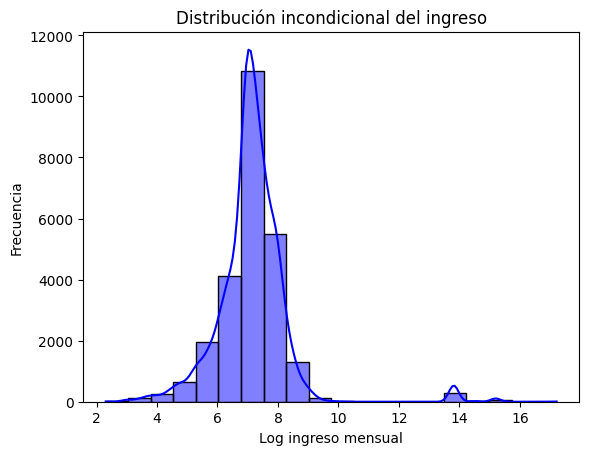

In [12]:
sns.histplot(data['log_ingreso_mensual'], kde=True, color="blue", bins=20)
plt.title("Distribución incondicional del ingreso")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.show()

# Distribución log-normal: aquella en la que el logaritmo natural de la variable sigue una distribución normal. 
# Si una variable aleatoria X tiene una distribución log-normal, entonces ln(X) sigue una distribución normal.

#### Distribuciones condicionales

In [13]:
# EJEMPLO 1: Sexo
# Crear un nuevo DataFrame
data1 = pd.DataFrame({
    'sexo': modulo_5['p207'],
    'log_ingreso_mensual': data['log_ingreso_mensual']
})
data1 = data1.dropna()
# Etiquetar los valores
data1['sexo'] = data1['sexo'].map({1: "Hombre", 2: "Mujer"})
data1

,sexo,log_ingreso_mensual
0,Hombre,7.495542
5,Hombre,7.549609
9,Mujer,7.649693
13,Mujer,6.476972
15,Mujer,3.912023
...,...,...
86633,Hombre,6.461468
86634,Mujer,6.461468
86635,Hombre,7.286192
86636,Mujer,5.886104


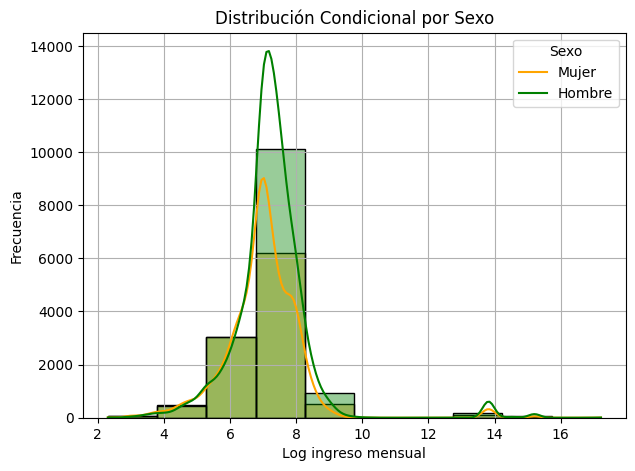

In [14]:
# Crear el gráfico de distribución condicional
plt.figure(figsize=(7, 5))
sns.histplot(data=data1, x='log_ingreso_mensual', hue='sexo', kde=True, bins=10, 
             palette={'Hombre': "green", 'Mujer': "orange"}, alpha=0.4)  # Ajuste de opacidad con alpha

# Ajustes del gráfico
plt.title("Distribución Condicional por Sexo")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.legend(labels=["Mujer", "Hombre"], title="Sexo")
plt.grid(True)
plt.show()

In [15]:
# Calcular estadísticas descriptivas por sexo
estadisticas_por_sexo = data1.groupby('sexo')['log_ingreso_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

# Redondear los valores a 2 decimales
estadisticas_por_sexo = estadisticas_por_sexo.round(2)

# Mostrar los resultados en formato tabular
print(tabulate(estadisticas_por_sexo, headers='keys', tablefmt='grid'))

+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|    | sexo   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+========+=========+===========+============+============+==========+==========+========+
|  0 | Hombre |    7.23 |      7.21 |       1.22 |       1.5  |      2.3 |    17.22 |   7.09 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | Mujer  |    7.01 |      7    |       1.23 |       1.51 |      2.3 |    17.22 |   7.09 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+


Interpretación:

* Ambas distribuciones presentan una forma asimétrica hacia la derecha, lo cual es típico de distribuciones de ingresos, incluso en su escala logarítmica.
* La mayoría de los datos están concentrados alrededor de valores logarítmicos entre 6 y 8, lo que corresponde a un rango de ingresos entre aproximadamente 400 y 2,980 en la escala original.
* La curva para los hombres (verde) está ligeramente desplazada hacia la derecha en comparación con la de las mujeres (naranja). Esto sugiere que los ingresos de los hombres son en promedio más altos que los de las mujeres.

In [16]:
# EJEMPLO 2: Area de residencia (urbano/rural)
# Crear un nuevo DataFrame
data2 = pd.DataFrame({
    'estrato': modulo_5['estrato'],
    'log_ingreso_mensual': data['log_ingreso_mensual']
})
data2 = data2.dropna()

# Crear la variable 'area'
data2['area'] = data2['estrato'].apply(lambda x: 1 if 1 <= x <= 5 else (0 if 6 <= x <= 8 else None))
# Etiquetar los valores
data2['area'] = data2['area'].map({1: "Urbano", 0: "Rural"})
data2

,estrato,log_ingreso_mensual,area
0,4,7.495542,Urbano
5,4,7.549609,Urbano
9,4,7.649693,Urbano
13,4,6.476972,Urbano
15,7,3.912023,Rural
...,...,...,...
86633,5,6.461468,Urbano
86634,5,6.461468,Urbano
86635,5,7.286192,Urbano
86636,5,5.886104,Urbano


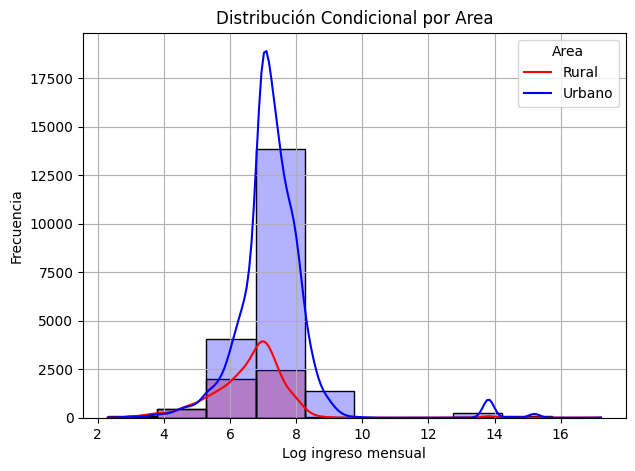

In [17]:
# Crear el gráfico de distribución condicional
plt.figure(figsize=(7, 5))
sns.histplot(data=data2, x='log_ingreso_mensual', hue='area', kde=True, bins=10, 
             palette={'Urbano': "blue", 'Rural': "red"}, alpha=0.30)  # Ajuste de opacidad con alpha

# Ajustes del gráfico
plt.title("Distribución Condicional por Area")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.legend(labels=["Rural", "Urbano"], title="Area")
plt.grid(True)
plt.show()

In [18]:
# Calcular estadísticas descriptivas por area
estadisticas_por_area = data2.groupby('area')['log_ingreso_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

# Redondear los valores a 2 decimales
estadisticas_por_area = estadisticas_por_area.round(2)

# Mostrar los resultados en formato tabular
print(tabulate(estadisticas_por_area, headers='keys', tablefmt='grid'))

+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|    | area   |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+========+=========+===========+============+============+==========+==========+========+
|  0 | Rural  |    6.59 |      6.78 |       1.18 |       1.4  |      2.3 |    17.22 |   7.09 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | Urbano |    7.28 |      7.22 |       1.2  |       1.45 |      2.3 |    17.22 |   7.09 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+


Interpretación:
* En promedio, los ingresos en áreas urbanas son mayores que en áreas rurales.
* La mediana sigue el mismo patrón que la media, mostrando que el ingreso es mayor en áreas urbanas.

In [30]:
# EJEMPLO 3: nivel educativo
# Para estandarizar los datos convertimos los valores a numéricos, NaN para valores no numéricos 
modulo_5['p301a'] = pd.to_numeric(modulo_5['p301a'], errors='coerce').fillna(0).astype(int)

# Crear un nuevo DataFrame
data3 = pd.DataFrame({
    'educacion': modulo_5['p301a'],
    'log_ingreso_mensual': data['log_ingreso_mensual']
})
data3 = data3.dropna()

# Crear un diccionario para mapear las etiquetas
etiquetas = {
    1: "sin nivel",
    2: "inicial",
    3: "primaria incompleta",
    4: "primaria completa",
    5: "secundaria incompleta",
    6: "secundaria completa",
    7: "superior no universitaria incompleta",
    8: "superior no universitaria completa",
    9: "superior universitaria incompleta",
    10: "superior universitaria completa",
    11: "maestría/doctorado",
    12: "básica especial"
}

data3['educacion_etiquetas'] = data3['educacion'].map(etiquetas)
data3

,educacion,log_ingreso_mensual,educacion_etiquetas
0,8,7.495542,superior no universitaria completa
5,8,7.549609,superior no universitaria completa
9,10,7.649693,superior universitaria completa
13,6,6.476972,secundaria completa
15,4,3.912023,primaria completa
...,...,...,...
86633,3,6.461468,primaria incompleta
86634,3,6.461468,primaria incompleta
86635,4,7.286192,primaria completa
86636,1,5.886104,sin nivel


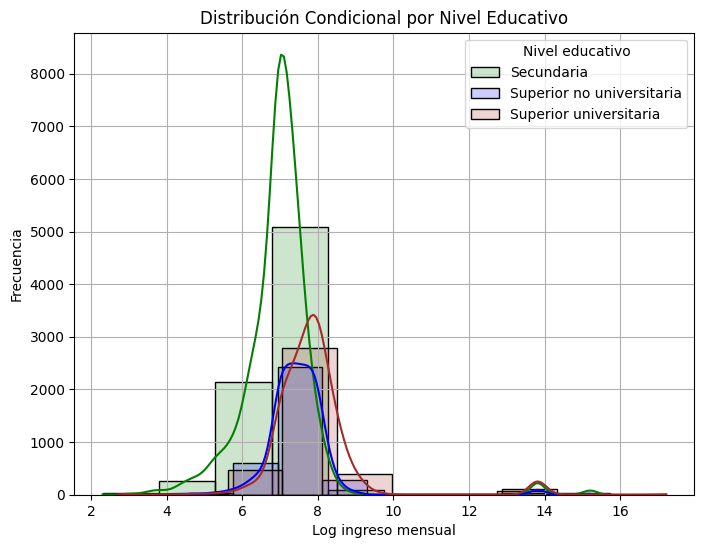

In [31]:
# Crear el gráfico
plt.figure(figsize=(8, 6))

# Gráfico para Secundaria completa
sns.histplot(data=data3[data3['educacion_etiquetas'] == 'secundaria completa'], x='log_ingreso_mensual', kde=True, bins=10, 
             color="green", alpha=0.2, label="Secundaria")

# Gráfico para Superior no universitaria completa
sns.histplot(data=data3[data3['educacion_etiquetas'] == 'superior no universitaria completa'], x='log_ingreso_mensual', kde=True, bins=10, 
             color="blue", alpha=0.2, label="Superior no universitaria")

# Gráfico para Superior universitaria completa
sns.histplot(data=data3[data3['educacion_etiquetas'] == 'superior universitaria completa'], x='log_ingreso_mensual', kde=True, bins=10, 
             color="brown", alpha=0.2, label="Superior universitaria")

# Ajustes del gráfico
plt.title("Distribución Condicional por Nivel Educativo")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.legend(title="Nivel educativo")

plt.grid(True)
plt.show()

* En promedio, quienes tienen educación superior tienen mayores ingresos mensuales (distribuciones desplazadas hacia la derecha)

In [29]:
# Calcular estadísticas descriptivas por nivel educativo
estadisticas_por_nivel = data3.groupby('educacion_etiquetas')['log_ingreso_mensual'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

# Redondear los valores a 2 decimales
estadisticas_por_nivel = estadisticas_por_nivel.round(2)

# Mostrar los resultados en formato tabular
print(tabulate(estadisticas_por_nivel, headers='keys', tablefmt='grid'))

+----+--------------------------------------+---------+-----------+------------+------------+----------+----------+--------+
|    | educacion_etiquetas                  |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+======================================+=========+===========+============+============+==========+==========+========+
|  0 | básica especial                      |    6.28 |      6.01 |       0.68 |       0.46 |     5.3  |     7.09 |   5.3  |
+----+--------------------------------------+---------+-----------+------------+------------+----------+----------+--------+
|  1 | inicial                              |    6.15 |      6.08 |       0.85 |       0.73 |     4.79 |     7.43 |   4.79 |
+----+--------------------------------------+---------+-----------+------------+------------+----------+----------+--------+
|  2 | maestría/doctorado                   |    8.29 |      8.16 |       0.89 |       0.8  |     5.7  |    13.82 |   8.01 |


Interpretación
* La media del logaritmo del ingreso mensual es mayor para aquellos con niveles educativos más altos.
* La mediana sigue una tendencia similar a la media, lo que refuerza que los niveles educativos más altos están relacionados con ingresos más altos. La mediana es un buen indicador para evitar distorsiones causadas por valores extremos.
* Los niveles educativos más altos muestran una mayor variabilidad en los ingresos, lo que podría reflejar una mayor diversidad en las ocupaciones o sectores laborales.